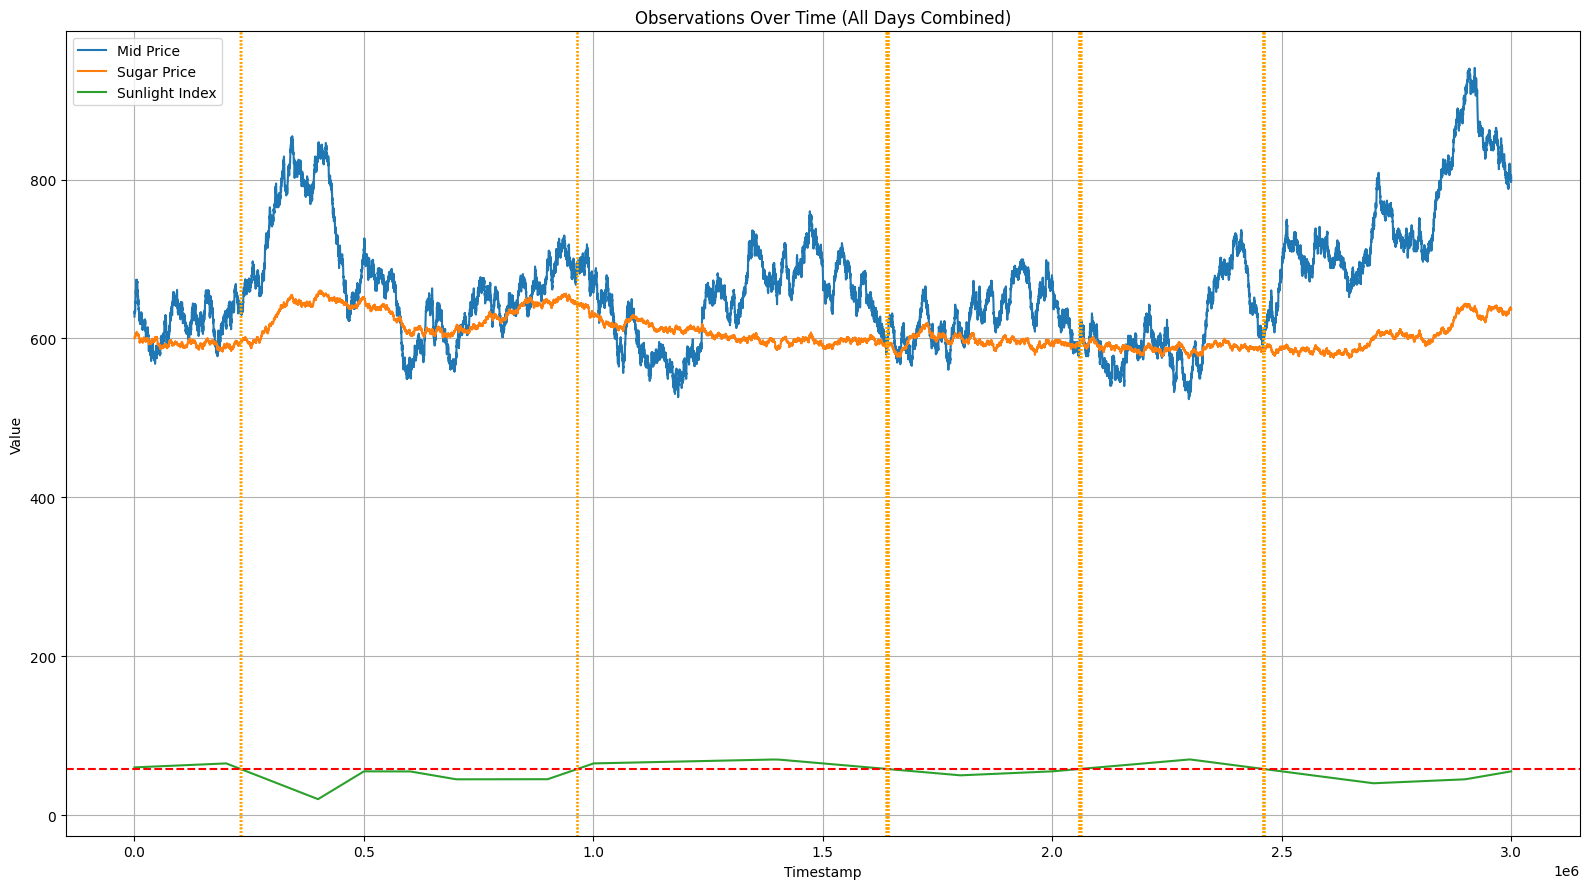

In [99]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# List of file paths
obs_file_paths = [
    "round-4-island-data-bottle/observations_round_4_day_1.csv",
    "round-4-island-data-bottle/observations_round_4_day_2.csv",
    "round-4-island-data-bottle/observations_round_4_day_3.csv",
]

# Read and combine all CSV files, shifting timestamps for each day
obs_dfs = []
for i, path in enumerate(obs_file_paths):
    df = pd.read_csv(path)
    df['timestamp'] += i * 1_000_000  # Shift timestamps per day
    obs_dfs.append(df)

obs_data = pd.concat(obs_dfs, ignore_index=True)

price_file_paths = [
    "round-4-island-data-bottle/prices_round_4_day_1.csv",
    "round-4-island-data-bottle/prices_round_4_day_2.csv",
    "round-4-island-data-bottle/prices_round_4_day_3.csv",
]

# Read and combine all CSV files, shifting timestamps for each day
price_dfs = []
for i, path in enumerate(price_file_paths):
    df = pd.read_csv(path, sep=';')
    df = df[df["product"] == "MAGNIFICENT_MACARONS"]
    df['timestamp'] += i * 1_000_000  # Shift timestamps per day
    price_dfs.append(df)

price_data = pd.concat(price_dfs, ignore_index=True)

data = pd.merge(obs_data, price_data[["timestamp", "mid_price"]], on="timestamp", how="inner")

threshold = 58
tolerance = 0.1

crossing_points = data[np.isclose(data['sunlightIndex'], threshold, atol=tolerance)]


# Plotting all relevant features
plt.figure(figsize=(16, 9))

plt.plot(data['timestamp'], data['mid_price'], label='Mid Price')
# plt.plot(data['timestamp'], data['bidPrice'], label='Bid Price', alpha=0.3)
# plt.plot(data['timestamp'], data['askPrice'], label='Ask Price', alpha=0.3)
plt.plot(data['timestamp'], data['sugarPrice'] * 3, label='Sugar Price')
plt.plot(data['timestamp'], data['sunlightIndex'], label='Sunlight Index')
# plt.plot(data['timestamp'], data['transportFees'], label='Transport Fees')
# plt.plot(data['timestamp'], data['exportTariff'], label='Export Tariff')
# plt.plot(data['timestamp'], data['importTariff'], label='Import Tariff')
plt.axhline(y=threshold, color='red', linestyle='--', linewidth=1.5)

for ts in crossing_points['timestamp']:
    plt.axvline(x=ts, color='orange', linestyle=':', linewidth=1)

plt.title("Observations Over Time (All Days Combined)")
plt.xlabel("Timestamp")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


📈 Mid Price Model Coefficients:
  sugarPrice      × 7.8059
  sunlightIndex   × -1.6473
  transportFees   × -80.2059
  exportTariff    × -67.8066
  importTariff    × -38.3489
  Intercept:      -230.4243


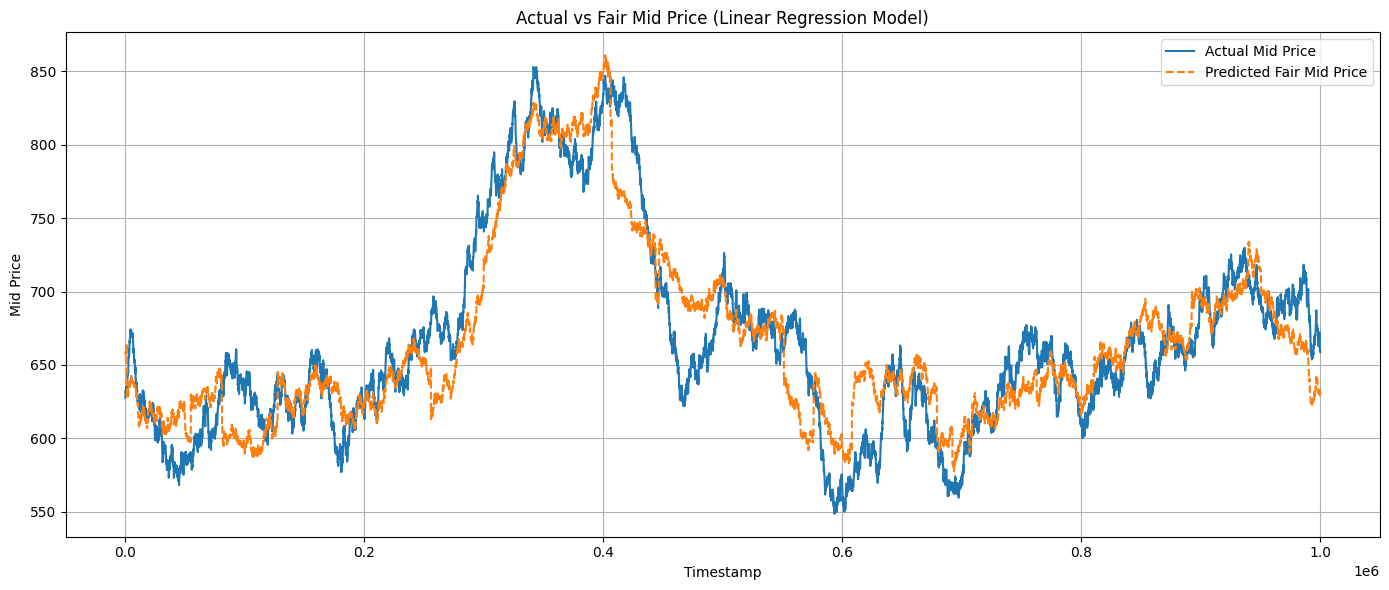

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Load the data
data = pd.read_csv("round-4-island-data-bottle/observations_round_4_day_1.csv")

# Compute mid price
data['midPrice'] = (data['bidPrice'] + data['askPrice']) / 2

# Features
features = ['sugarPrice', 'sunlightIndex', 'transportFees', 'exportTariff', 'importTariff']
X = data[features]
y = data['midPrice']

# Fit linear regression model
model = LinearRegression().fit(X, y)
data['fair_mid'] = model.predict(X)

# Print coefficients
print("📈 Mid Price Model Coefficients:")
for name, coef in zip(features, model.coef_):
    print(f"  {name:15s} × {coef:.4f}")
print(f"  Intercept:      {model.intercept_:.4f}")

# Plot actual vs predicted mid prices
plt.figure(figsize=(14, 6))
plt.plot(data['timestamp'], data['midPrice'], label='Actual Mid Price')
plt.plot(data['timestamp'], data['fair_mid'], '--', label='Predicted Fair Mid Price')
plt.xlabel("Timestamp")
plt.ylabel("Mid Price")
plt.title("Actual vs Fair Mid Price (Linear Regression Model)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

📈 Mid Price Model Coefficients:
  sugarPrice      × 1.7433
  sunlightIndex   × 2.8734
  transportFees   × 170.4331
  exportTariff    × 11.0071
  importTariff    × 33.1591
  Intercept:      -221.0105


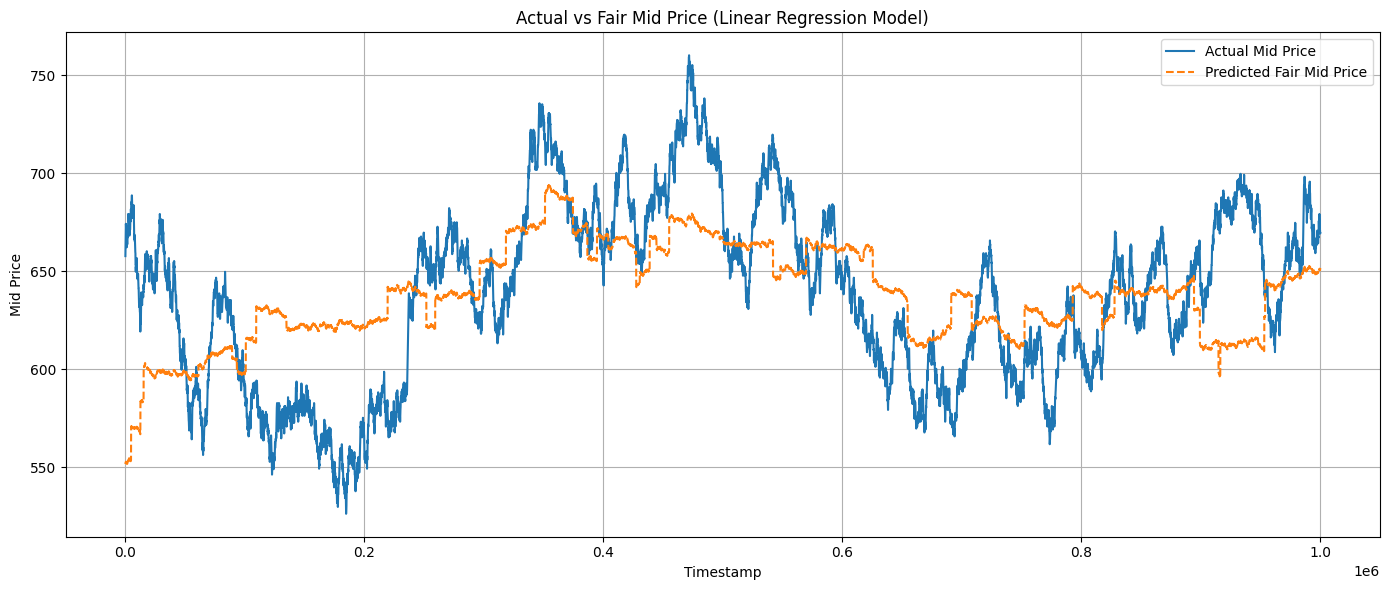

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Load the data
data = pd.read_csv("round-4-island-data-bottle/observations_round_4_day_2.csv")

# Compute mid price
data['midPrice'] = (data['bidPrice'] + data['askPrice']) / 2

# Features
features = ['sugarPrice', 'sunlightIndex', 'transportFees', 'exportTariff', 'importTariff']
X = data[features]
y = data['midPrice']

# Fit linear regression model
model = LinearRegression().fit(X, y)
data['fair_mid'] = model.predict(X)

# Print coefficients
print("📈 Mid Price Model Coefficients:")
for name, coef in zip(features, model.coef_):
    print(f"  {name:15s} × {coef:.4f}")
print(f"  Intercept:      {model.intercept_:.4f}")

# Plot actual vs predicted mid prices
plt.figure(figsize=(14, 6))
plt.plot(data['timestamp'], data['midPrice'], label='Actual Mid Price')
plt.plot(data['timestamp'], data['fair_mid'], '--', label='Predicted Fair Mid Price')
plt.xlabel("Timestamp")
plt.ylabel("Mid Price")
plt.title("Actual vs Fair Mid Price (Linear Regression Model)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


📈 Mid Price Model Coefficients:
  sugarPrice      × 12.6190
  sunlightIndex   × -0.7455
  transportFees   × 36.2382
  exportTariff    × 26.9168
  importTariff    × -31.1317
  Intercept:      -2286.2214


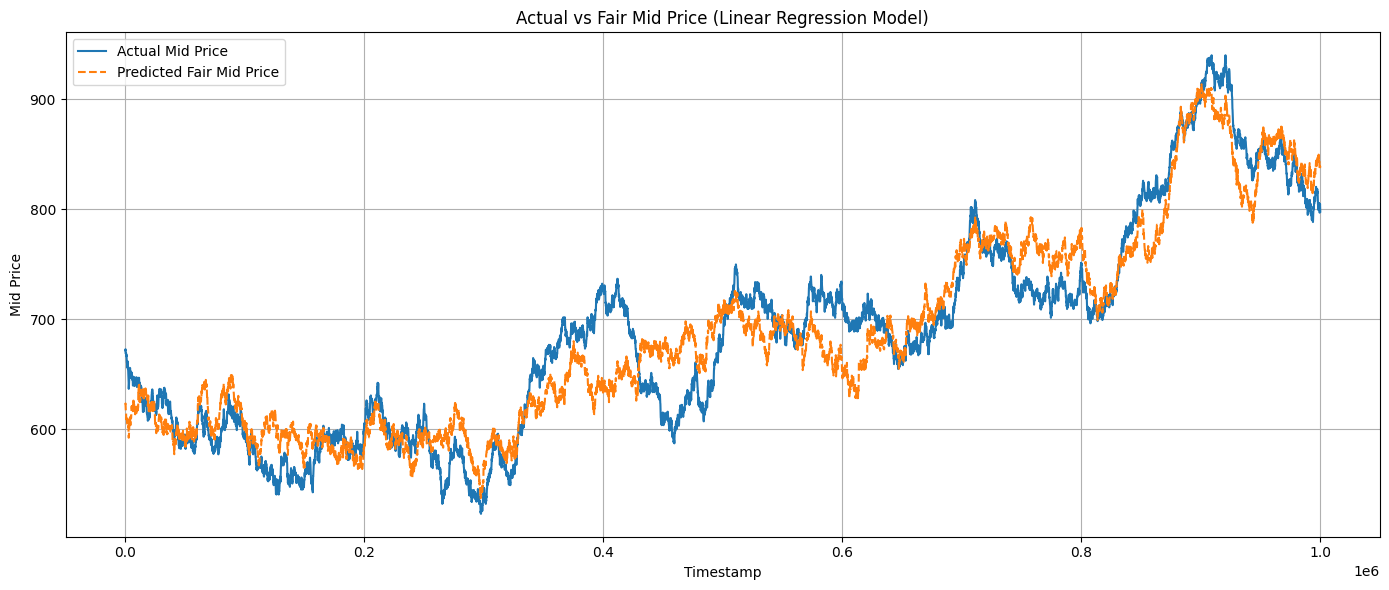

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Load the data
data = pd.read_csv("round-4-island-data-bottle/observations_round_4_day_3.csv")

# Compute mid price
data['midPrice'] = (data['bidPrice'] + data['askPrice']) / 2

# Features
features = ['sugarPrice', 'sunlightIndex', 'transportFees', 'exportTariff', 'importTariff']
X = data[features]
y = data['midPrice']

# Fit linear regression model
model = LinearRegression().fit(X, y)
data['fair_mid'] = model.predict(X)

# Print coefficients
print("📈 Mid Price Model Coefficients:")
for name, coef in zip(features, model.coef_):
    print(f"  {name:15s} × {coef:.4f}")
print(f"  Intercept:      {model.intercept_:.4f}")

# Plot actual vs predicted mid prices
plt.figure(figsize=(14, 6))
plt.plot(data['timestamp'], data['midPrice'], label='Actual Mid Price')
plt.plot(data['timestamp'], data['fair_mid'], '--', label='Predicted Fair Mid Price')
plt.xlabel("Timestamp")
plt.ylabel("Mid Price")
plt.title("Actual vs Fair Mid Price (Linear Regression Model)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


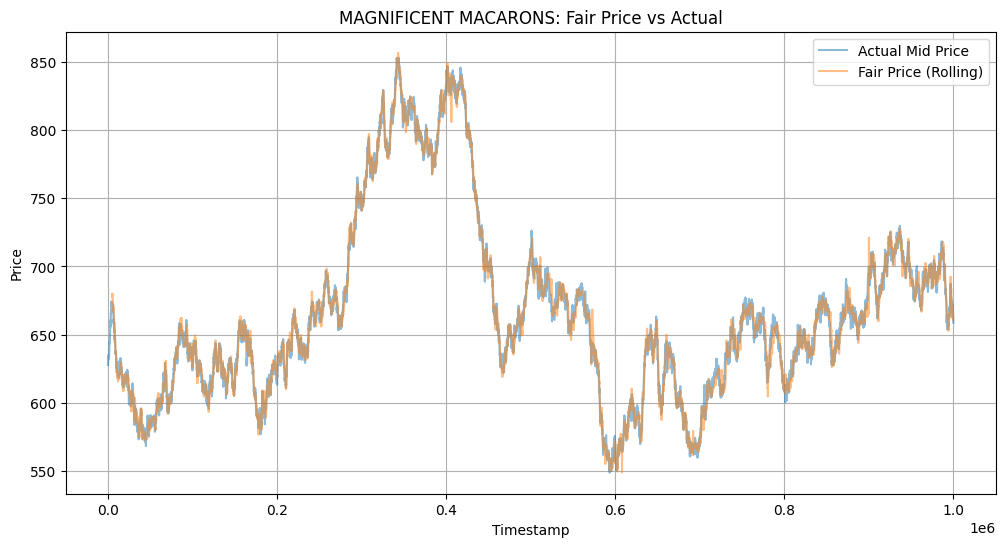

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv("round-4-island-data-bottle/observations_round_4_day_1.csv")
df["midPrice"] = (df["bidPrice"] + df["askPrice"]) / 2

# Feature columns
features = ["sugarPrice", "sunlightIndex", "transportFees", "exportTariff", "importTariff"]
X_raw = df[features].values
y = df["midPrice"].values

# Add intercept term (column of 1s)
X_with_intercept = np.hstack((np.ones((len(df), 1)), X_raw))

# Rolling regression
window_size = 50
fair_prices = [np.nan] * window_size

for i in range(window_size, len(df)):
    X_window = X_with_intercept[i - window_size:i]
    y_window = y[i - window_size:i]

    try:
        beta = np.linalg.pinv(X_window) @ y_window
        fair_price = X_with_intercept[i] @ beta

        if abs(fair_price - y[i]) / y[i] > 0.05:
            fair_price = np.nan
    except np.linalg.LinAlgError:
        fair_price = np.nan

    fair_prices.append(fair_price)

df["fair_price"] = fair_prices

plt.figure(figsize=(12, 6))
plt.plot(df["timestamp"], df["midPrice"], label="Actual Mid Price", alpha=0.5)
plt.plot(df["timestamp"], df["fair_price"], label="Fair Price (Rolling)", alpha=0.5)
plt.legend()
plt.title("MAGNIFICENT MACARONS: Fair Price vs Actual")
plt.xlabel("Timestamp")
plt.ylabel("Price")
plt.grid(True)
plt.show()

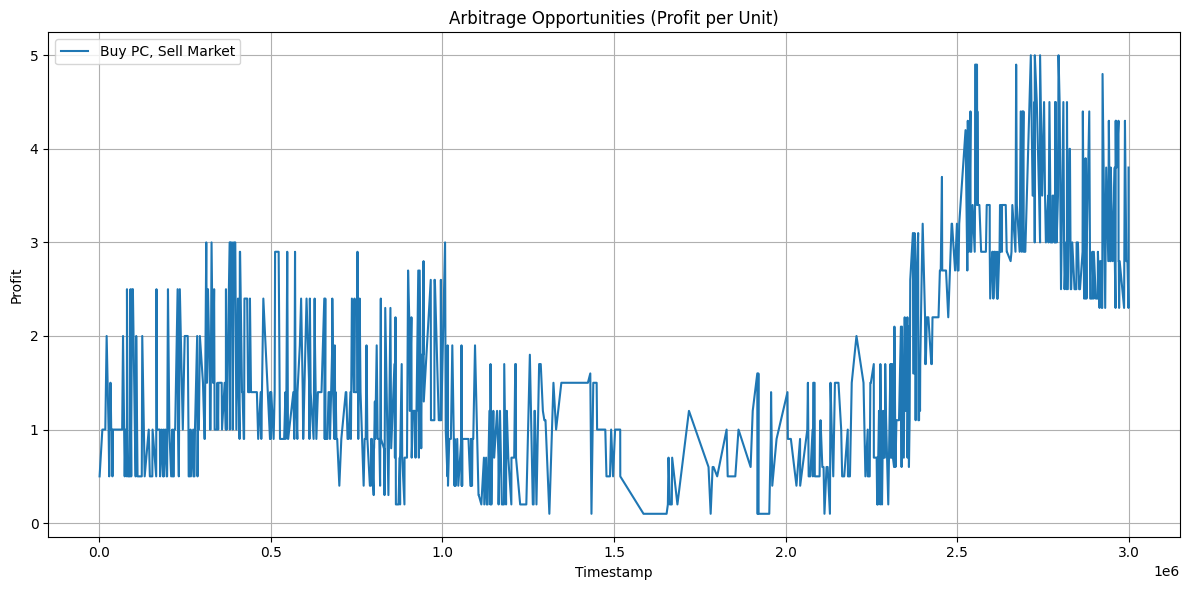

In [ ]:
import pandas as pd

# === Load and Merge Data ===

# Observation files
obs_files = [
    "round-4-island-data-bottle/observations_round_4_day_1.csv",
    "round-4-island-data-bottle/observations_round_4_day_2.csv",
    "round-4-island-data-bottle/observations_round_4_day_3.csv",
]

# Price files
price_files = [
    "round-4-island-data-bottle/prices_round_4_day_1.csv",
    "round-4-island-data-bottle/prices_round_4_day_2.csv",
    "round-4-island-data-bottle/prices_round_4_day_3.csv",
]

# Load observations
obs_dfs = []
for i, file in enumerate(obs_files):
    df = pd.read_csv(file)
    df["timestamp"] += i * 1_000_000
    obs_dfs.append(df)
all_obs = pd.concat(obs_dfs, ignore_index=True)

# Load and filter price data for MACARONS
price_dfs = []
for i, file in enumerate(price_files):
    df = pd.read_csv(file, sep=';')
    df = df[df["product"] == "MAGNIFICENT_MACARONS"]
    df["timestamp"] += i * 1_000_000
    price_dfs.append(df)
all_prices = pd.concat(price_dfs, ignore_index=True)

# Merge on timestamp
merged = pd.merge(all_obs, all_prices, on="timestamp", how="inner")

# === Arbitrage Detection ===

opportunities = []

for _, row in merged.iterrows():
    ts = row["timestamp"]
    market_ask = row["ask_price_1"]
    market_bid = row["bid_price_1"]
    pc_buy_cost = row["askPrice"] + row["transportFees"] + row["importTariff"]
    pc_sell_revenue = row["bidPrice"] - row["transportFees"] - row["exportTariff"]

    # Case 1: Buy on Market, Sell to PC
    if market_ask < pc_sell_revenue:
        profit = pc_sell_revenue - market_ask
        opportunities.append((ts, "Buy Market, Sell PC", profit))

    # Case 2: Buy from PC, Sell on Market
    if pc_buy_cost < market_bid:
        profit = market_bid - pc_buy_cost
        opportunities.append((ts, "Buy PC, Sell Market", profit))

# Convert to DataFrame for inspection
arb_df = pd.DataFrame(opportunities, columns=["timestamp", "type", "profit"])
arb_df_sorted = arb_df.sort_values(by="timestamp").reset_index(drop=True)

import matplotlib.pyplot as plt

# === Plot Arbitrage Profits ===
plt.figure(figsize=(12, 6))
for label, group in arb_df_sorted.groupby("type"):
    plt.plot(group["timestamp"], group["profit"], label=label)

plt.title("Arbitrage Opportunities (Profit per Unit)")
plt.xlabel("Timestamp")
plt.ylabel("Profit")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

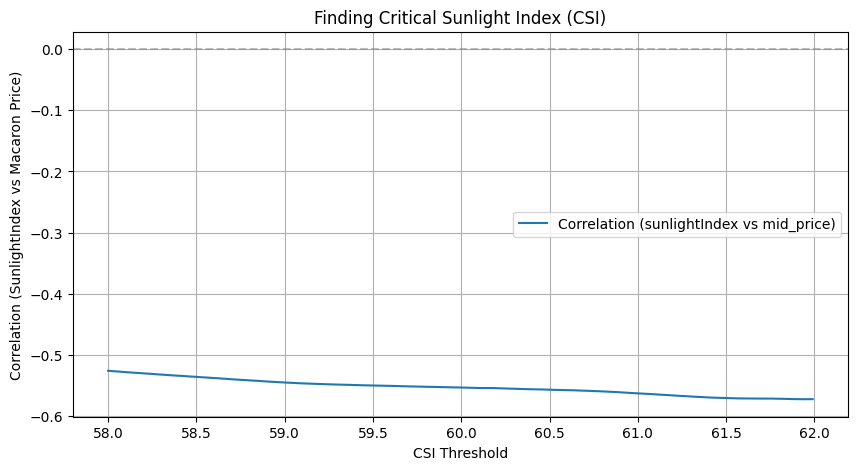

In [ ]:
# Try CSI values from 58.0 to 62.0 in 0.01 increments
csis = np.arange(58.0, 62.0, 0.01)
correlations = []

for csi in csis:
    low_sunlight_data = data[data["sunlightIndex"] < csi]
    if len(low_sunlight_data) > 30:  # filter out noise from too few data points
        corr = low_sunlight_data["sunlightIndex"].corr(low_sunlight_data["mid_price"])
        correlations.append(corr)
    else:
        correlations.append(np.nan)

# Plot correlation vs CSI threshold
plt.figure(figsize=(10, 5))
plt.plot(csis, correlations, label="Correlation (sunlightIndex vs mid_price)")
plt.axhline(0, color='gray', linestyle='--', alpha=0.5)
plt.title("Finding Critical Sunlight Index (CSI)")
plt.xlabel("CSI Threshold")
plt.ylabel("Correlation (SunlightIndex vs Macaron Price)")
plt.grid(True)
plt.legend()
plt.show()


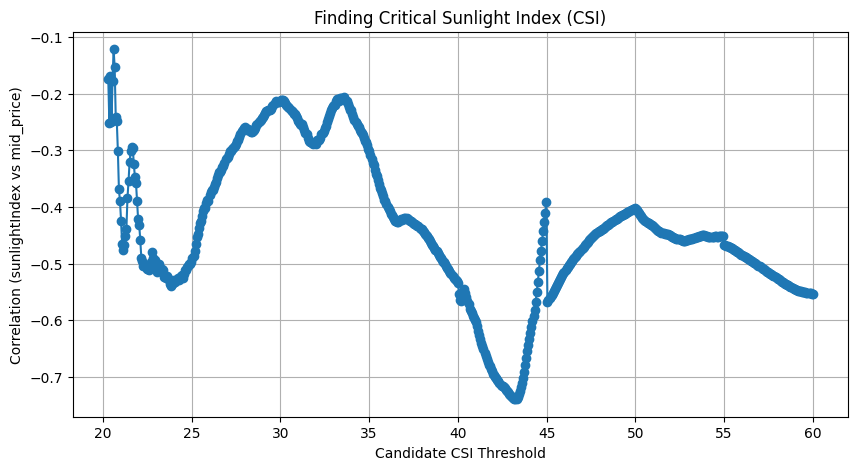

🔍 Identified Critical Sunlight Index (CSI): 43.24


In [64]:
candidate_csis = np.linspace(0, 60, 1000)
correlations = []

for csi in candidate_csis:
    subset = data[data["sunlightIndex"] < csi]
    if len(subset) > 20:  # Ensure enough data points
        corr = subset["sunlightIndex"].corr(subset["mid_price"])
        correlations.append(corr)
    else:
        correlations.append(np.nan)

# Step 2: Plot correlation vs CSI
plt.figure(figsize=(10, 5))
plt.plot(candidate_csis, correlations, marker='o')
plt.xlabel("Candidate CSI Threshold")
plt.ylabel("Correlation (sunlightIndex vs mid_price)")
plt.title("Finding Critical Sunlight Index (CSI)")
plt.grid(True)
plt.show()

# Step 3: Find best CSI
min_corr_index = np.nanargmin(correlations)
critical_csi = candidate_csis[min_corr_index]
print(f"🔍 Identified Critical Sunlight Index (CSI): {critical_csi:.2f}")

In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Combine your observation and price CSVs as you've already done
data = pd.merge(obs_data, price_data[["timestamp", "mid_price"]], on="timestamp", how="inner")

# Bin sunlightIndex into intervals
data["sunlight_bin"] = pd.cut(data["sunlightIndex"], bins=np.linspace(data["sunlightIndex"].min(), data["sunlightIndex"].max(), 50))

# Compute average mid_price per sunlight bin
grouped = data.groupby("sunlight_bin")["mid_price"].mean()
bin_centers = grouped.index.map(lambda x: (x.left + x.right) / 2)

# Approximate CSI as the point where average price increases sharply
price_diff = grouped.diff().fillna(0)
estimated_csi = price_diff.idxmin().mid
print(f"🌞 Estimated Critical Sunlight Index (CSI): {estimated_csi:.2f}")

🌞 Estimated Critical Sunlight Index (CSI): 45.00


/var/folders/zb/cfcdg17x6w54903lf3svck8m0000gn/T/ipykernel_9045/2890914126.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = data.groupby("sunlight_bin")["mid_price"].mean()


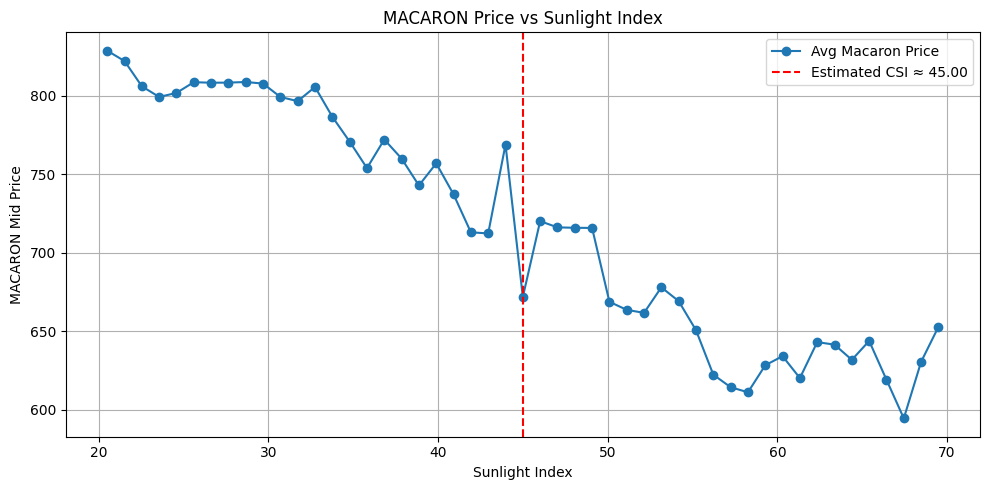

In [71]:
plt.figure(figsize=(10, 5))
plt.plot(bin_centers, grouped, marker='o', label="Avg Macaron Price")
plt.axvline(estimated_csi, color='red', linestyle='--', label=f"Estimated CSI ≈ {estimated_csi:.2f}")
plt.xlabel("Sunlight Index")
plt.ylabel("MACARON Mid Price")
plt.title("MACARON Price vs Sunlight Index")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()